# Preamble

In [1]:
# Plotting the line scans requires (inline only chosen for github presentation):
%matplotlib qt5
#%matplotlib inline
from pl_analysis import EELS_image_fit as eif_class

/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:58: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  mpl.rcParams['text.latex.unicode'] = True


In [2]:
######## Loading an EEL spectrum image
######## For more information, see docstring.
eif = eif_class(is_lazy=True)

Does the file include stored models from previous fitting? (y/n): y
[########################################] | 100% Completed |  0.6s
Available models: 

"0" :  VolumePlasmonDrude_leastsq_ls 

"1" :  VolumePlasmonDrude_mpfit_ls 

"2" :  VolumePlasmonDrude_NelderMead_ml 

"3" :  Lorentzian_leastsq_ls 

"4" :  Lorentzian_mpfit_ls 

"5" :  Lorentzian_NelderMead_ml 

"6" :  Gaussian_leastsq_ls 

"7" :  Gaussian_mpfit_ls 

"8" :  Gaussian_NelderMead_ml 

"9" :  Voigt_leastsq_ls 

"10" :  Voigt_mpfit_ls 

"11" :  Voigt_NelderMead_ml 


If you want to exit the model loading process,please type: ("exit"/"cancel")
Which model should be loaded? 0
Loading parameter maps for: VolumePlasmonDrude_leastsq_ls
Parameter images loaded. Setting properties...
Finished loading parameter images.
Parameter images loaded. Setting properties...
Finished loading parameter images.
Finished loading process.
[########################################] | 100% Completed |  0.1s
Aligning datastructure successful. Es

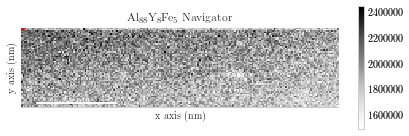

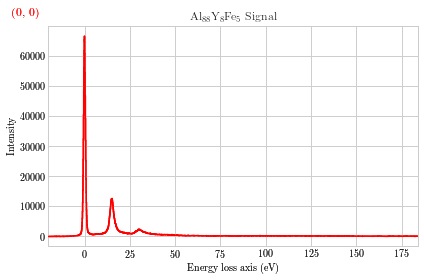

In [3]:
#AlYFe1 Linescan1: x1=23.4343, y1=2.45814, x2=27.2907, y2=44.7392, linewidth=41.5702
#AlYFe1 Linescan2:
#AlYFe1 Linescan3:
#AlYFe_2-1: x1=120.22, y1=3.85437, x2=116.264, y2=30., linewidth=32.9363
#AlYFe_2-2:
#Vitreloy Compression : x1=0.00815447, y1=0.0828949, x2=0.121439, y2=0.0818016, linewidth=0.152995
eif.File.metadata.General.title = ('$\mathrm{Al}_{88}\mathrm{Y}_8\mathrm{Fe}_5$'
                                  )
eif.File.plot()

# Full evaluation a fitted model

In [3]:
######### Loading a new model and correspond parameters
######### into class attribute for analysis.
######### Plotting a signal or linescan as follows:
######### Attributes can be found directly in eif.
######### See hyperspy documentation of plot() function
######### for more information on arguments.
eif.load_model(mkey='0')
eif.Fit_Model.signal.metadata.General.title = ('$\mathrm{Al}_{88}\mathrm{Y}_8\mathrm{Fe}_5$' 
                                               + ' - ' + eif.function_set + ' ' + eif.optimizer + ' -'
                                              )

eif.Fit_Model.plot()

#### The line to specify the spatial location of
#### the line scan can be read out by:
#eif.line
#will be None if not initiated.

import hyperspy.api as hs
#### A line can be set manually with source and 
#### destination coordinates as follows_
#### Manually setting the line to none to enable
#### interactive mode.
#### The else clause is actually not needed if 
#### a previous line scan was run with the 
#### line in demand. Just added to make sure
#### it is set correctly every time. Until now
#### no issue was experienced with not adding
#### the else-clause.
new_line=False
if new_line:
    eif.line=None
else:
    eif.line = hs.roi.Line2DROI(x1=124.456, 
                                y1=4.75241, 
                                x2=126.787, 
                                y2=45.481, 
                                linewidth=47.092
                               )

#### If no line is specified an interactive widget
#### is supported to be adjusted on the Ep_q0 signal

#### Setting the time to wait for adjustments 
#### (default = 30):
#eif.time=15

#### Clearing the previously generated linescans
#### Has to be done previous to any linescans following
#### the first linescan generation:
eif.linescans = {}

#### If thickness signal is calculated it will be 
#### considered for the linescan generation and
#### fitted by a polynom if specified.
#### Elements and composition have to be specified as
#### follows:
eif.calc_thickness(['Al','Y','Fe'], 
                   [0.88,0.07,0.05]
                  )

#### Generating all parameter linescans and
#### if specified fitting the linescans by
#### polynomial approach and in addition
#### if a peak is found trying to fit a 
#### parameter shift by a gauß approach
#### (attribute enabling fitting: parameter_shifts).
eif.generate_linescans(order=0,
                       parameter_shifts=True, 
                       show=False, 
                       sensitivity=1, 
                       medfilt_radius=3,
                       peakgroup=3,
                       polygradn=1
                      )
save=True
if (save==True):
    ## ATTENTION: Does not work with %matplotlib inline
    eif.save_evaluation()

[########################################] | 100% Completed |  0.1s
Available models: 

"0" :  VolumePlasmonDrude_leastsq_ls 

"1" :  VolumePlasmonDrude_mpfit_ls 

"2" :  VolumePlasmonDrude_NelderMead_ml 

"3" :  Lorentzian_leastsq_ls 

"4" :  Lorentzian_mpfit_ls 

"5" :  Lorentzian_NelderMead_ml 

"6" :  Gaussian_leastsq_ls 

"7" :  Gaussian_mpfit_ls 

"8" :  Gaussian_NelderMead_ml 

"9" :  Voigt_leastsq_ls 

"10" :  Voigt_mpfit_ls 

"11" :  Voigt_NelderMead_ml 

Loading parameter maps for: VolumePlasmonDrude_leastsq_ls
Parameter images loaded. Setting properties...
Finished loading parameter images.
Finished loading process.
[########################################] | 100% Completed |  0.1s
Estimated mean free path: 7.82E+01 nm
Variance estimation for: Plasmon energy - $E_{p}(q=0)$
mean variance:  0.0003676471171807673
mean variance of fitted parameters:  4.333053413551663e-07

Estimation for: Plasmon energy - $E_{p}(q=0)$ - line scan

weight factors:  [0.99526087 0.99524708 0.99523


OHaver estimates:  [array([( 3.88526095, 0.00326461, 2.15864543),
       (22.34025046, 0.00747477,        nan),
       (33.99603331, 0.00674334, 6.71366118)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([(13.59841332, 0.0066528 , 7.26456543),
       (17.48367427, 0.00306156,        nan),
       (28.16814189, 0.0019531 ,        nan),
       (35.93866379, 0.00398681,        nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
First first check
First third check
First all check
peak accepted: [3.88526095e+00 3.26461228e-03 2.15864543e+00]
Second first check
First first check
First third check
First all check
peak accepted: [3.39960333e+01 6.74333827e-03 6.71366118e+00]
First first check
First third check
Second first check
Second first check
Second first check
[array([3.88526095e+00, 3.26461228e-03, 2.15864543e+00]), array([3.39960333e+01, 6.74333827e-03, 6.71366118e+00])]
[3.39960333e+01 6.74333827e-03 6.71366118e+00]
[3.39960333e+01 6.74333827e-03 6.71366118e+00]

Used estimate for most dominant gaussian peak in bounds:  [3.39960333e+01 6.74333827e-03 6.71366118e+00]

Position estimation of sheared region with lower standard deviati

/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:5022: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_new = integrate.quad(lambda x: func_gaus(x,*peak), offset, max_pos)[0]


Variance estimation for: thickness by log-ratio
mean variance:  1.19152227715142
thickness by log-ratio: 

'NoneType' object has no attribute 'sqrt'

Falling back using spatial error estimation.

Estimation for: thickness by log-ratio - line scan

weight factors:  [0.99526087 0.99524708 0.99523393 0.99522141 0.99520955 0.99519833
 0.99518777 0.99517787 0.99516864 0.99516007 0.99515218 0.99514496
 0.99513842 0.99513256 0.99512738 0.99512289 0.99511909 0.99511597
 0.99511355 0.99511182 0.99511078 0.99511043 0.99511078 0.99511182
 0.99511355 0.99511597 0.99511909 0.99512289 0.99512738 0.99513256
 0.99513842 0.99514496 0.99515218 0.99516007 0.99516864 0.99517787
 0.99518777 0.99519833 0.99520955 0.99522141 0.99523393 0.99524708]

fitted initial polynomial parameter:  [55.75778847  0.15973112]

polynomial weighted least squared fit:  [55.75779104  0.15973113] [[ 2.42841698e-03 -8.82146650e-05]
 [-8.82146650e-05  4.32475286e-06]]

Fit summarization - resulting parameters:  [ 0.          0.  


OHaver estimates:  [array([( 3.88526095, 0.00394796,        nan),
       (20.39761999, 0.0035213 , 2.38052517),
       (33.99603331, 0.00850038, 9.03843221)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([(13.59841332, 0.00693531, 6.15829849),
       (17.48367427, 0.00294927,        nan),
       (24.28288094, 0.00493875, 1.8849091 ),
       (35.93866379, 0.00393361,        nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
Second first check
First first check
First third check
First all check
peak accepted: [2.03976200e+01 3.52130197e-03 2.38052517e+00]
First first check
First third check
First all check
peak accepted: [ 1.35984133e+01 -6.93531254e-03  6.15829849e+00]
Second first check
First first check
Second first check
[array([2.03976200e+01, 3.52130197e-03, 2.38052517e+00]), array([ 1.35984133e+01, -6.93531254e-03,  6.15829849e+00])]
[2.03976200e+01 3.52130197e-03 2.38052517e+00]
[2.03976200e+01 3.52130197e-03 2.38052517e+00]

Used estimate for most dominant gaussian peak in bounds:  [2.03976200e+01 3.52130197e-03 2.38052517e+00]

Position estimation of sheared region with lower standard deviation:
$1.438 \pm 1.315

Fit summa


OHaver estimates:  [array([( 5.82789142, 0.01893371, 10.38847077),
       (11.65578285, 0.01904959,  9.66014374),
       (15.5410438 , 0.01388618,  2.29932161),
       (28.16814189, 0.02340591,  2.7310565 ),
       (33.99603331, 0.03917873,         nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([(13.59841332, 0.00679012,  2.46138422),
       (22.34025046, 0.08764737, 12.61611096)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
First first check
First third check
First all check
peak accepted: [ 5.82789142  0.01893371 10.38847077]
First first check
First first check
First first check
Second first check
First first check
First first check
First third check
First all check
peak accepted: [22.34025046 -0.08764737 12.61611096]
[array([ 5.82789142,  0.01893371, 10.38847077]), array([22.34025046, -0.08764737, 12.61611096])]
[ 5.82789142  0.01893371 10.38847077]
[ 5.82789142  0.01893371 10.38847077]

Used estimate for most dominant gaussian peak in bounds:  [ 5.82789142  0.01893371 10.38847077]

Fit summarization - resulting parameters:  [3.30175186e+00 1.38864184e-01 9.24431471e+00 2.64482188e+00
 3.83289983e-03]

Fit summarization - resulting covariance matrix:  [[ 6.55418220e+00 -1.12065856e-01 -7.52065725e+00  1.21367308e-01
 


OHaver estimates:  [array([(12.62709809, 326.19500816,        nan),
       (21.36893522, 660.9416245 , 2.74627987),
       (31.0820876 , 224.67812212,        nan),
       (35.93866379, 390.50167776,        nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([( 4.85657619, 209.01864156,        nan),
       ( 9.71315237,  95.94769013, 2.49392124),
       (15.5410438 , 189.65780718,        nan),
       (24.28288094, 703.76141493, 2.56113725)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
Second first check
First first check
First third check
First all check
peak accepted: [ 21.36893522 660.9416245    2.74627987]
Second first check
Second first check
Second first check
First first check
Second first check
First first check
[array([ 21.36893522, 660.9416245 ,   2.74627987])]
[ 21.36893522 660.9416245    2.74627987]
[ 21.36893522 660.9416245    2.74627987]

Used estimate for most dominant gaussian peak in bounds:  [ 21.36893522 660.9416245    2.74627987]

Position estimation of sheared region with lower standard deviation:
$0.965 \pm 0.135

Fit summarization - resulting parameters:  [ 2.19442323e+01  6.63604304e+02  9.65474944e-01  2.19804512e+04
 -3.01339460e+01]

Fit summarization - resul


OHaver estimates:  [array([(12.62709809, 16450.88701139, 5.4443832)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([(24.28288094, 33856.54636777, 1.48624048)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
First first check
First third check
First all check
peak accepted: [1.26270981e+01 1.64508870e+04 5.44438320e+00]
First first check
[array([1.26270981e+01, 1.64508870e+04, 5.44438320e+00])]
[1.26270981e+01 1.64508870e+04 5.44438320e+00]
[1.26270981e+01 1.64508870e+04 5.44438320e+00]

Used estimate for most dominant gaussian peak in bounds:  [1.26270981e+01 1.64508870e+04 5.44438320e+00]

Fit summarization - resulting parameters:  [ 2.18303794e+01  2.42724303e+04  7.90181237e-01  1.00501529e+06
 -4.16207607e+03]

Fit summarization - resulting covariance matrix:  [[ 1.98997635e-01 -1.08947890e+02  6.56992526e-03  2.85857124e+01
  -1.61720453e+00]
 [-1.08947890e+02  1.25864387e+08 -2.22353745e+03 -2.19959288e+06
  -2.60410900e+04]
 [ 6.56992526e-03 -2.22353745e+03  1.64804567e-01 -1.06389368e+02
  -1.37584304e+00]
 [ 2.85857124e+01 -2.19959288e+0

/home/ag-wilde/anaconda3/envs/Hyperspy/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:3956: RuntimeWarning: Mean of empty slice
  mean_line_fstd = np.nanmean(line_fstd.data)
/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:3963: RuntimeWarning: Mean of empty slice
  print('mean variance of fitted parameters: ',np.nanmean(line_var_fstd.data))


mean variance of fitted parameters:  nan
Variance estimation for: second Plasmon peak - $\Gamma$
mean variance:  0.3020130650277235
mean variance of fitted parameters:  0.0011381743956650151
Variance estimation for: second Plasmon peak - intensity
mean variance:  116196.57399630651
mean variance of fitted parameters:  160.16075858429878
Variance estimation for: intensity ratio - $I_{pp}/I_{zlp}$
mean variance:  1.874217590720219e-07
intensity ratio - $I_{pp}/I_{zlp}$: 

'DictionaryTreeBrowser' object has no attribute 'Noise_properties'

Falling back using spatial error estimation.

Estimation for: intensity ratio - $I_{pp}/I_{zlp}$ - line scan

weight factors:  [0.99526087 0.99524708 0.99523393 0.99522141 0.99520955 0.99519833
 0.99518777 0.99517787 0.99516864 0.99516007 0.99515218 0.99514496
 0.99513842 0.99513256 0.99512738 0.99512289 0.99511909 0.99511597
 0.99511355 0.99511182 0.99511078 0.99511043 0.99511078 0.99511182
 0.99511355 0.99511597 0.99511909 0.99512289 0.99512738 0.9951


OHaver estimates:  [array([], dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([], dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
[]
[0. 0. 1.]
The parameter shifts found do not match expected ranges for gaussian estimation.
Maybe sensitivity (scaling of lower bound of sigma), medfilt_radius (smoothing) or 
polygradn (higher DOF for thickness dependence) can lead improved peak estimation 
using Ohaver.


Fit summarization - resulting parameters:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.18174274e-02
 7.29254547e-05]

Fit summarization - resulting covariance matrix:  [[inf inf inf nan nan]
 [inf inf inf nan nan]
 [inf inf inf nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


NameError: name 'save' is not defined

# Reading out lines

In [25]:
eif.line

Line2DROI(x1=100.456, y1=4.75241, x2=105.787, y2=45.481, linewidth=47.092)

/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:3276: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.linescan_plots[key].show()


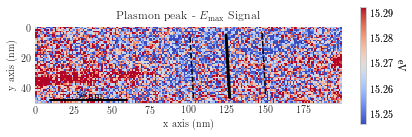

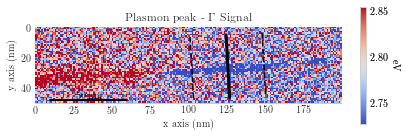

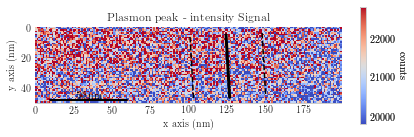

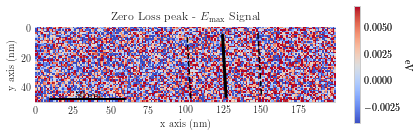

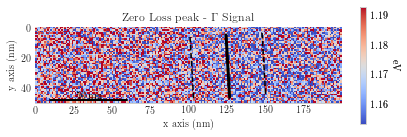

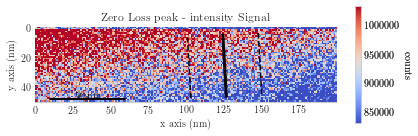

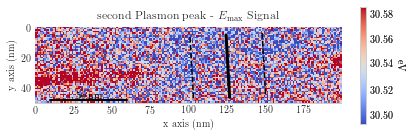

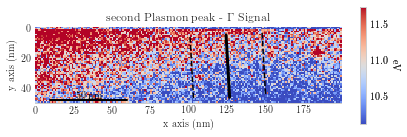

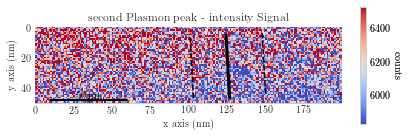

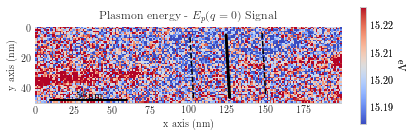

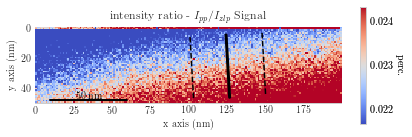

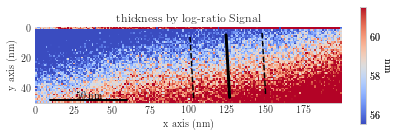

In [9]:
eif.plot_parameter_maps(overview=False)

# Linescans manually:

In [14]:
eif.linescans

{'Plasmon energy - $E_{p}(q=0)$': <BaseSignal, title: Plasmon energy - $E_{p}(q=0)$ - line scan, dimensions: (|43)>,
 'thickness by log-ratio': <BaseSignal, title: thickness by log-ratio - line scan, dimensions: (|43)>,
 'Plasmon peak - $E_{\\max}$': <BaseSignal, title: Plasmon peak - $E_{\max}$ - line scan, dimensions: (|43)>,
 'Plasmon peak - $\\Gamma$': <BaseSignal, title: Plasmon peak - $\Gamma$ - line scan, dimensions: (|43)>,
 'Plasmon peak - intensity': <BaseSignal, title: Plasmon peak - intensity - line scan, dimensions: (|43)>,
 'Zero Loss peak - $E_{\\max}$': <BaseSignal, title: Zero Loss peak - $E_{\max}$ - line scan, dimensions: (|43)>,
 'Zero Loss peak - $\\Gamma$': <BaseSignal, title: Zero Loss peak - $\Gamma$ - line scan, dimensions: (|43)>,
 'Zero Loss peak - intensity': <BaseSignal, title: Zero Loss peak - intensity - line scan, dimensions: (|43)>,
 'second Plasmon peak - $E_{\\max}$': <BaseSignal, title: second Plasmon peak - $E_{\max}$ - line scan, dimensions: (|43)>

In [9]:
eif.estimate_parametershift(eif.linescans['Plasmon peak - $\\Gamma$'],
                            True,
                            force_negative=True,
                            poly_gradn=1,
                            maxpeakn=10,
                            peakgroup=3,
                            sensitivity=1)


Estimation for: Plasmon peak - $\Gamma$ - line scan

weight factors:  [0.99514439 0.99512992 0.99511614 0.99510305 0.99509065 0.99507896
 0.99506797 0.99505769 0.99504812 0.99503928 0.99503116 0.99502376
 0.9950171  0.99501116 0.99500597 0.99500151 0.99499779 0.99499481
 0.99499258 0.99499109 0.99499035 0.99499035 0.99499109 0.99499258
 0.99499481 0.99499779 0.99500151 0.99500597 0.99501116 0.9950171
 0.99502376 0.99503116 0.99503928 0.99504812 0.99505769 0.99506797
 0.99507896 0.99509065 0.99510305 0.99511614 0.99512992]

fitted initial polynomial parameter:  [ 2.77868031e+00 -2.64772952e-04]

polynomial weighted least squared fit:  [ 2.77868151e+00 -2.64764694e-04] [[ 9.36094195e-05 -3.48298398e-06]
 [-3.48298398e-06  1.74951319e-07]]



OHaver estimates:  [array([(21.36500792, 0.09033817, 8.51068888)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
First first check
First third check
First all check
peak accepted: (21.365007917913513, -0.09033817333472483, 8.510688876433598)
[(21.365007917913513, -0.09033817333472483, 8.510688876433598)]
(21.365007917913513, -0.09033817333472483, 8.510688876433598)
[21.36500792 -0.09033817  8.51068888]

Used estimate for most dominant gaussian peak in bounds:  [21.36500792 -0.09033817  8.51068888]

Fit summarization - resulting parameters:  [ 2.16028642e+01 -1.13072751e-01  1.89655936e+00  2.78864956e+00
 -1.03868094e-04]

Fit summarization - resulting covariance matrix:  [[ 1.34873264e-02 -2.05196660e-06  6.88340306e-05 -2.49518406e-05
   1.28935668e-06]
 [-2.05196660e-06  3.69847082e-05  3.53784530e-04 -1.39704161e-06
  -2.28067834e-08]
 [ 6.88340306e-05  3.53784530e-04  1.48749487e-02  4.68633450e-05
   7.65073087e-07]
 [-2.49518406e-05 -1.39704161e-06  4

# HAADF correlation with parameter maps

In [ ]:
######### Cross correlation between parameter maps and
######### a corresponding HAADF image which has to be 
######### loaded during main loading routine or by
######### calling the dfimage() function
eif.load_dfimage(rotate=True)
# example attribute self.Ep_q0
eif.cross_correlation(eif.Ep_q0)